<a href="https://colab.research.google.com/github/jihyuk1023/AI_physics/blob/main/03_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80%EC%99%80_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 퍼셉트론 논리 게이트

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])  #1차원 벡터 선언
    w = np.array([0.5, 0.5])#1차원 벡터 선언
    b = -.7
    tmp = np.sum(w*x) + b   #벡터 내적 := 스칼라 값 생성
                            # tmp = 1/2 * x1 + 1/2 * x2 - 0.7 
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -.2
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    else:
        return 1

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = .7
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    else:
        return 1
  
def XOR(x1, x2):
  a1 = AND(x1, x2)
  a2 = OR(x1, x2)
  x = np.array([a1, a2])
  w = np.array([-0.5, 0.5])
  b = -.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

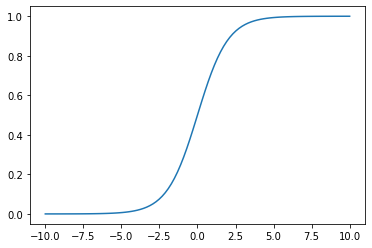

In [ ]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x,y)
plt.show()

# 단순 선형 회귀 문제

In [ ]:
import numpy as np
import matplotlib.pyplot as plt=

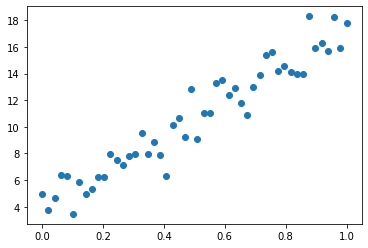

In [ ]:
def noise_linear_dataset(n_points, slope, intercept, noise, x_starts=0, x_ends=1):
  xdata = np.linspace(x_starts, x_ends, n_points)
  ydata = xdata * slope + intercept + np.random.normal(0, noise, n_points)
  return xdata, ydata

np.random.seed(0)
xdata, ydata = noise_linear_dataset(50, 15, 3, 1.1)
plt.scatter(xdata,ydata)
plt.show()

In [ ]:
def predict(xdata, w, b):
  return w * xdata + b

def get_error_list(ydata, y_hat_data):
  return ydata - y_hat_data

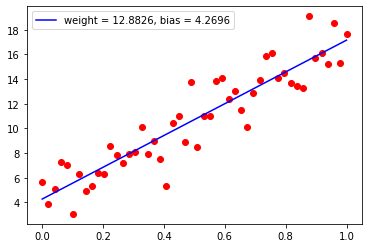

In [ ]:
w = 1
b = 1
epoch = 200

for i in range(epoch):
  y_hat_data = predict(xdata, w, b)
  error = get_error_list(ydata, y_hat_data)
  w += np.mean(error * xdata)
  b += np.mean(error)

x = np.linspace(0,1,100)
y = predict(x, w, b)

plt.plot(x,y, c= 'b', label = 'weight = {:.4f}, bias = {:.4f}'.format(w, b))
plt.scatter(xdata ,ydata, c = 'r')
plt.legend()
plt.show()

# Neural Network Regression (BISHOP 5.2)


In [ ]:
import numpy as np
import matplotlib.pyplot
import tqdm

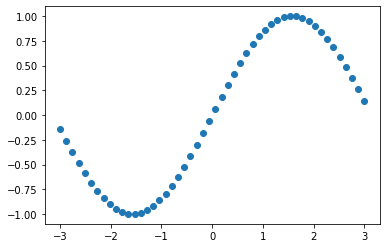

In [ ]:
x_data = np.linspace(-3, 3, 50)
y_data = np.sin(x_data)

plt.scatter(x_data, y_data)
plt.show()

In [ ]:
class layer():
  def __init__(self, n_neuron):
    self.n_neuron = n_neuron

In [ ]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

def softmax(array):
  return np.exp(array) / np.sum(np.exp(array), axis = 1)

In [ ]:
class FCNet:
  def __init__(self):
    self.layers = []

  def append_layer(self, n_neuron):
    self.layers.append(layer(n_neuron)) #layer object들을 추가합니다. layer object는 n_neuron을 그 속성으로 가집니다. 따라서, model.append_layer(300)은 뉴런의 개수가 300개인 레이어가 모델에 추가됩니다.

  def compile(self):
    self.weight = [] # 각 층의 weight를 담을 리스트를 생성합니다.
    self.bias = [] # 각 층의 bias를 담을 리스트를 생성합니다.
    self.len_layers = len(self.layers) # layer의 개수를 의미합니다. 
    for i in range(self.len_layers - 1): # weight, bias는 각 층의 연결시에 필요하므로 그 개수는 레이어 개수보다 한 개 적습니다.
      W = np.random.normal(0, 1, (self.layers[i].n_neuron, self.layers[i+1].n_neuron)) # 각 층의 weight는 [입력층 뉴런 수, 출력층 뉴런 수]의 파라미터를 가집니다.
      b = np.random.normal(0, 1, (self.layers[i+1].n_neuron)) # 각 층의 bias는 [출력층 뉴런수]개의 파라미터를 가집니다.
      self.weight.append(W) # 리스트에 weight를 저장합니다.
      self.bias.append(b)
    self.compiled = True

  def forward(self, batch):
    self.layer_outputs = [batch] # layer_outputs를 생성합니다. 이는 각 출력층의 값들입니다. 첫 번째 원소는 input이여야 하므로, 입력받은 batch를 이미 리스트로 가지고 있습니다.
    for index, (weight, bias) in enumerate(zip(self.weight, self.bias)): # enumerate 함수는 index, object를, zip 함수는 두 object를 동시에 호출하는 함수입니다.
      new_batch = np.dot(batch, weight) + bias # 다음 층의 출력을 계산합니다. Wx + b
      if index != len(self.layers)-2:
        new_batch = np.tanh(new_batch)
      batch = new_batch # 다음 층에도 이를 통과시키기 위해 batch를 new_batch로 변경합니다.
      self.layer_outputs.append(batch) # layer_outputs에 출력층의 값을 추가해줍니다.

  def loss(self, prediction, output): 
    loss = 1/2 * np.sum((prediction - output)**2)
    return loss

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------- 아래는 다음시간 내용입니다. 피팅이 된다는 것을 보여주기 위해 작성한 코드이니 크게 신경쓰지 않아도 됩니다. -------------------------------------------------------
# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  def backpropagation(self, output): 
    self.weight_grad = [] # weight의 기울기 리스트를 생성합니다.
    self.bias_grad = []# bias의 기울기 리스트를 생성합니다.
    for idx in range(self.len_layers - 1): # 인덱싱이 복잡합니다. 역전파 이므로 순서가 반대입니다.
      if idx == 0: # 마지막 층 인덱스에서
        dC_ds = self.layer_outputs[-1] - output # dC/ds 는 (x_k - t_k) 
      else: # 나머지 층에서
        x = self.layer_outputs[-(idx+1)]
        dx_ds = (1 + x) * (1 - x) # dx/ds 는 tanh의 미분 x(1-x)입니다.
        dC_ds = dC_ds @ self.weight[-(idx)].T * dx_ds # dC/dsj = dC/dsk * dsk/dxj * dxj/dsj 
      ds_dw = self.layer_outputs[-(idx+2)] # dsj/dwj는 항상 그 이전층 xi입니다.
      dC_dw = (dC_ds.reshape(self.batch_size, -1, 1) @ ds_dw.reshape(self.batch_size, 1,-1)).T #dC_dw = dC/ds * ds/dw
      dC_db = dC_ds # ds/db = 1 입니다.
      dC_dw = np.mean(dC_dw, axis = 2) # 각 batch의 cost function은 원래 cost function의 평균값입니다.
      dC_db = np.mean(dC_db, axis = 0) 
      self.weight_grad.append(dC_dw) # weight grad 리스트에 weight의 기울기를 추가합니다.
      self.bias_grad.append(dC_db)
    self.weight_grad = self.weight_grad[::-1] #오차 역전파는 반대방향이므로, 방향을 통일하기 위해 뒤집습니다.
    self.bias_grad = self.bias_grad[::-1]
  
  def fit(self, x, y, epochs, batch_size):
    self.batch_size = batch_size
    for epoch in range(epochs):
      for i in tqdm.tqdm(range(len(x) // batch_size)): # batch의 개수입니다. tqdm module은 상태 바를 만들어줍니다. 진행 상황을 확인할 수 있습니다.
        self.forward(x) # batch를 이용하여 데이터를 예측합니다.
        self.backpropagation(y) # 오차 역전파를 진행합니다.
        for i in range(self.len_layers - 1): 
          self.weight[i] = self.weight[i] - 0.1 * self.weight_grad[i] # weight를 업데이트 합니다. weight_grad 값에 스칼라를 곱해 이 속도를 조절할 수 있습니다.
          self.bias[i] = self.bias[i] - 0.1 *self.bias_grad[i] # bias를 업데이트 합니다. 
      print("one epoch ends.... loss = {}".format(self.loss(self.layer_outputs[-1], y)))

In [ ]:
# network 만들기 

net = FCNet()
net.append_layer(50)
net.append_layer(3)
net.append_layer(50)
net.compile()

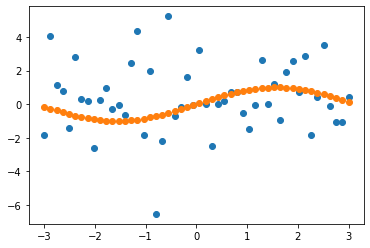

116.12876797539828

In [ ]:
# fitting 전 예측

net.forward(x_data)
out = net.layer_outputs[-1]
plt.scatter(x_data, out)
plt.scatter(x_data, y_data)
plt.show()

net.loss(out, y_data)

In [ ]:
net.fit(x_data,y_data, 10, 1)

100%|██████████| 50/50 [00:00<00:00, 7981.25it/s]

one epoch ends.... loss = 1.6950109440552063e-30
one epoch ends.... loss = 1.6950109440552063e-30
one epoch ends.... loss = 1.6950109440552063e-30
one epoch ends.... loss = 1.6796035045001084e-30
one epoch ends.... loss = 1.6765220165890888e-30
one epoch ends.... loss = 1.6765220165890888e-30
one epoch ends.... loss = 1.6950109440552063e-30
one epoch ends.... loss = 1.698092431966226e-30
one epoch ends.... loss = 1.6950109440552063e-30
one epoch ends.... loss = 1.6950109440552063e-30


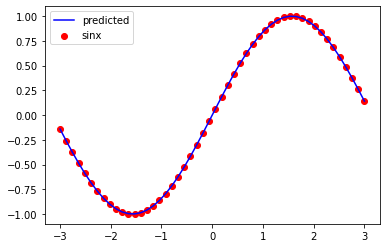

1.6950109440552063e-30

In [ ]:
# fitting 후 예측

net.forward(x_data)
out = net.layer_outputs[-1]
plt.plot(x_data, out, c= 'b', label = 'predicted')
plt.scatter(x_data, y_data, c='r', label = 'sinx')
plt.legend()
plt.show()

net.loss(out, y_data)